# Assignment 1: Getting Started with NetworkX
## Summer 2024

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import numpy as np
import scipy as sp
from typing import Tuple, List, Dict, Union

## Part 1- Intro to NetworkX [20 points]
***
### Generating graphs with NetworkX 
### 1.1

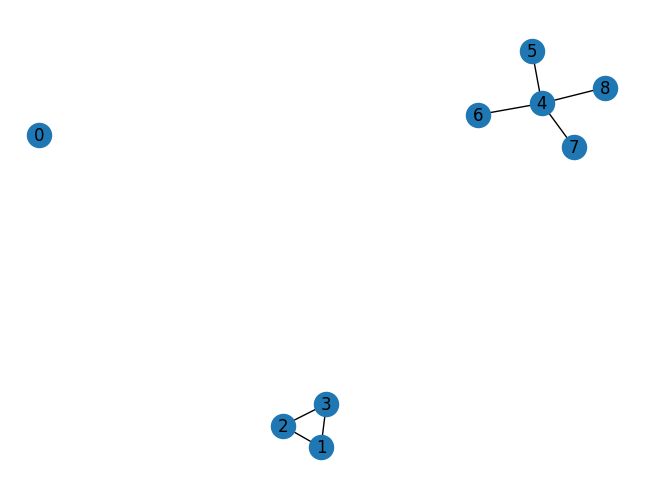

In [2]:
#Implement your code and show the visualization

def practice_graphs() -> None:
    
    """
    Returns:
    
    Nothing, but draws the visualizations of the graphs.
    """
    
    # This line is a placeholder
    G = nx.Graph()
    G.add_node("0")
    G.add_node("1")
    G.add_node("2")
    G.add_node("3")
    G.add_node("4")
    G.add_node("5")
    G.add_node("6")
    G.add_node("7")
    G.add_node("8")
    G.add_edge("1","2")
    G.add_edge("2","3")
    G.add_edge("1","3")
    G.add_edge("4","5")
    G.add_edge("4","6")
    G.add_edge("4","7")
    G.add_edge("4","8")
    pos = nx.spring_layout(G, k=0.5)
    return nx.draw(G, with_labels=True)
    
practice_graphs()

### 1.2

In [3]:
# Write a function that returns the 3 10-node toy networks from the assignment pdf

def create_toy_graphs()-> Tuple[nx.Graph, nx.Graph, nx.Graph]:
    
    """
    
    Returns:
    cycle: a networkx graph object meeting the requirements of a cycle
    clique: a networkx graph object meeting the requirements of a clique
    star: a networkx graph object meeting the requirements of a star network
    
    """
    
    #These lines are placeholders
    cycle=nx.cycle_graph(10)
    clique = nx.complete_graph(10)
    star = nx.star_graph(9)
    
    return cycle, clique, star

cycle,clique,star = create_toy_graphs()

# Write a function that will return the leading eigenvalue of the adjacency matrix of a given network.

def calculate_leading_eigenvalue(G) -> float:
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    eig (float): leading eigenvalue of the adjacency matrix 
    
    """
    adjacency_matrix = nx.to_numpy_array(G)
    eigenvalues,_ = np.linalg.eig(adjacency_matrix)
    eig=max(eigenvalues)
    
    # This is a placeholder
    #eig = 7280.00
    
    return eig
cycle_eig = calculate_leading_eigenvalue(cycle)
clique_eig = calculate_leading_eigenvalue(clique)
star_eig = calculate_leading_eigenvalue(star)

print("Cycle Network:")
print(f"Number of nodes: {cycle.number_of_nodes()}")
print(f"Number of edges: {cycle.number_of_edges()}")
print(f"Maximum degree: {max(dict(nx.degree(cycle)).values())}")
print(f"Average degree: {sum(dict(nx.degree(cycle)).values()) / cycle.number_of_nodes():.4f}")
print(f"Leading eigenvalue: {cycle_eig:.2f}")
print()
print("Clique Network:")
print(f"Number of nodes: {clique.number_of_nodes()}")
print(f"Number of edges: {clique.number_of_edges()}")
print(f"Maximum degree: {max(dict(nx.degree(clique)).values())}")
print(f"Average degree: {sum(dict(nx.degree(clique)).values()) / clique.number_of_nodes():.4f}")
print(f"Leading eigenvalue: {clique_eig:.2f}")
print()
print("Star Network:")
print(f"Number of nodes: {star.number_of_nodes()}")
print(f"Number of edges: {star.number_of_edges()}")
print(f"Maximum degree: {max(dict(nx.degree(star)).values())}")
print(f"Average degree: {sum(dict(nx.degree(star)).values()) / star.number_of_nodes():.4f}")
print(f"Leading eigenvalue: {star_eig:.2f}")


Cycle Network:
Number of nodes: 10
Number of edges: 10
Maximum degree: 2
Average degree: 2.0000
Leading eigenvalue: 2.00

Clique Network:
Number of nodes: 10
Number of edges: 45
Maximum degree: 9
Average degree: 9.0000
Leading eigenvalue: 9.00

Star Network:
Number of nodes: 10
Number of edges: 9
Maximum degree: 9
Average degree: 1.8000
Leading eigenvalue: 3.00


What is the relationship between the eigenvalue of the adjacency matrix, the maximum degree, and average degree of each network?

For the cycle and clique networks, the leading eigenvalue of the adjacency matrix is equal to the maximum degree and the average degree of the network.
For the star network, the leading eigenvalue is equal to the maximum degree of the central node, but it is not equal to the average degree of the network.

### Importing Map Data 
### 1.3

In [4]:
# write a function to load cities_data.graphml using built in NetworkX methods
def load_cities_data() -> nx.Graph:
    """
    Returns:
    G: NetworkX Graph object
    """
    
    # this is a placeholder, load the city data into a graph, G
    G = nx.read_graphml("cities_data.graphml")
    
    return G

# find the number of nodes in the graph
def find_number_of_nodes(G) -> int:
    """
    Input:
    G: NetworkX Graph object
    
    Output:
    num_nodes (int): number of nodes in G
    """
    
    # this is a placeholder, find the number of nodes in G
    num_nodes = G.number_of_nodes()

    return num_nodes

# find the number of edges in the graph
def find_number_of_edges(G) -> int:
    """
    Input:
    G: NetworkX Graph object
    
    Output:
    num_edges (int): number of edges in G
    """
    
    # this is a placeholder, find the number of edges in G
    num_edges =G.number_of_edges()

    return num_edges


# find the number of city pairs that are less than 50 miles apart
def cities_within_50(G) -> int:
    """
    Input:
    G: NetworkX Graph object
    
    Output:
    num_cities: number of city pairs that are less than 50 miles apart
    """
    
    # this is a placeholder
    # find the number of pairs of cities that are < 50 miles apart
    num_cities = 0
    for u,v,data in G.edges(data=True):
        if data['weight']<50:
            num_cities += 1

    return num_cities

a How many nodes are there? 128
b. How many edges? 8128
c. How many pairs of cities are less than 50 miles apart? 8

### 1.4

In [5]:
# Implement your code and show the visualization of Question 4
def cities_within_100(G, city_list) -> nx.Graph:
    '''
    Input
    G: NetworkX graph object
    city_list: list of strings (names of cities in G)

    Output
    S: NetworX graph object (subgraph of G that only contains edges between cities in “city_list” and directly neighboring cities that are less than 100 miles away)
    '''
        
    # This is a placeholder
    S = nx.Graph()
    S.add_nodes_from(city_list)
    for city in city_list:
        neighbouring_cities=G[city]
        for neighbour in neighbouring_cities:
            distance=G[city][neighbour]['weight']
            if distance <100:
                S.add_edge(city,neighbour,weight=distance)
    return S

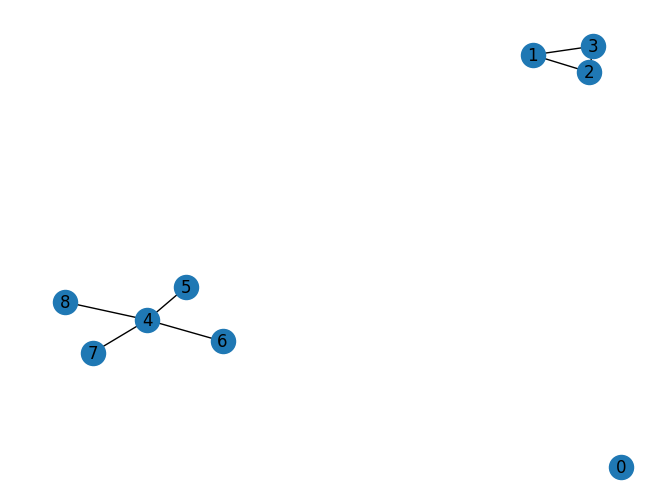

leading eigenvalue for cycle graph 2.0
leading eigenvalue for clique graph 8.999999999999998
leading eigenvalue for star graph 2.9999999999999996
number of nodes in cities_data: 128
number of edges in cities_data: 8128
number of city pairs within 50 miles: 8


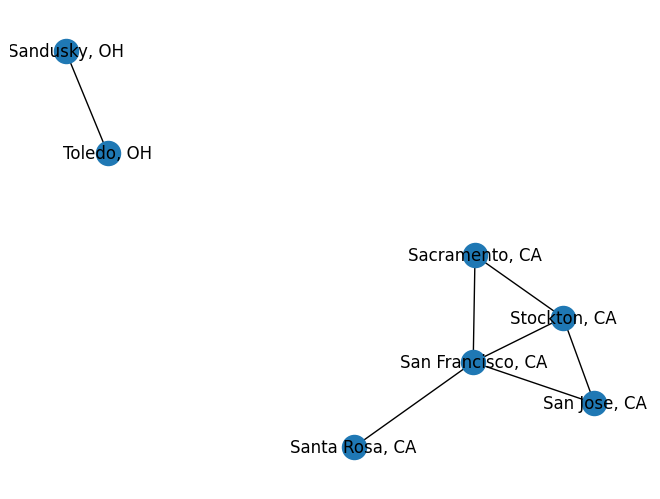

In [6]:
# This cell is used to output your data. Do not modify it.

# 1.1 practice drawing a graph
practice_graphs()
plt.show()

# 1.2 practice using graph generators and find max eigenvavlue
G_cycle, G_clique, G_star = create_toy_graphs()

print("leading eigenvalue for cycle graph", calculate_leading_eigenvalue(G_cycle))
print("leading eigenvalue for clique graph", calculate_leading_eigenvalue(G_clique))
print("leading eigenvalue for star graph", calculate_leading_eigenvalue(G_star))

# 1.3 load city data and gather some data
G_cities = load_cities_data()
print("number of nodes in cities_data:", find_number_of_nodes(G_cities))
print("number of edges in cities_data:", find_number_of_edges(G_cities))
print("number of city pairs within 50 miles:", cities_within_50(G_cities))

# 1.4 find cities within 100 miles
S = cities_within_100(G_cities, [ "Toledo, OH", "Stockton, CA", "San Francisco, CA" ])
nx.draw(S, with_labels=True,  pos=nx.spring_layout(S,  k=3))
plt.show()

### Part 2 - Random Walks of Les Misérables [20 points]
### 2.1

In [7]:
# write a function to load lesmis_data.gml using built in NetworkX methods
def load_lesmis_data() -> nx.Graph:
    """
    Returns:
    G: NetworkX Graph object
    """
    
    # this is a placeholder, load the lesmis data into a graph, G
    G = nx.read_gml("lesmis_data.gml")
    
    return G


### 2.2

In [8]:
# Write a function that will return if the graph connected or unconnected.
def lesmis_connected(G) -> bool:
    """
    Input
    G: NetworkX graph object
    
    Returns:
    les_mis_connected (Boolean): whether the graph is connected or not
    
    """

    
    # These lines are placeholders. Use NetworkX to determine if the graph is connected.
    les_mis_connected = nx.is_connected(G)
    
    return les_mis_connected

### 2.3

In [9]:
# calculate the shortest path length between each pair of nodes in the graph.
def calculate_shortest_paths(G) -> List:
    """
    Inputs
    G: NetworkX graph object

    Returns:
    shortest_paths (list): list of shortest paths between each pair of nodes in the graph.

    NOTE: 
    You may use any structure you'd like to store the shortest paths. The list return above is merely a suggestion.
    It can be a list of path lengths, a dictionary with node pairs as keys and path lengths as values, etc.
    """
    # These lines are placeholders
    # You may use any structure you'd like to store the shortest paths.
    # It can be a list of path lengths, a dictionary with node pairs as keys and path lengths as values, etc.
    shortest_paths = []
    for source in G.nodes:
        for target in G.nodes:
            if source != target:
                shortest_paths.append(nx.shortest_path_length(G,source,target))
    
    return shortest_paths

# plot the distribution of shortest paths using a histogram or barplot.
def plot_shortest_paths(G) -> None:
    """
    Inputs
    G: NetworkX graph object

    Returns:
    Nothing
    """
    # Create a plot of the distribution of shortest paths.
    # you may use the calculate_shortest_paths fuction to help.
   
    shortest_paths = calculate_shortest_paths(G)
    plt.hist(shortest_paths,bins="auto")
    plt.title('Distribution of Shortest Path Lengths')
    plt.xlabel('Shortest Path Length')
    plt.ylabel('Frequency')
    plt.show()

# find the average shortest path length of the graph.
def average_shortest_path(G) -> float:
    """
    Inputs
    G: NetworkX graph object

    Returns:
    aspl (float): average shortest path length of the graph
    """
    # This line is a placeholder
    # You may use the calculate_shortest_paths fuction to help.
    shortest_paths = calculate_shortest_paths(G)
    aspl = sum(shortest_paths)/len(shortest_paths)
    
    return aspl

# find the maximum shortest path length of the graph.
def maximum_shortest_path(G) -> int:
    """
    Inputs
    G: NetworkX graph object

    Returns:
    mspl (int): maximum shortest path length of the graph
    """
    # This line is a placeholder
    # You may use the calculate_shortest_paths fuction to help.
    shortest_paths = calculate_shortest_paths(G)
    mspl = max(shortest_paths)
    
    return mspl


### 2.4

In [10]:
# Implement a function that will calculate the stationary distribution to find the 3 most commonly mentioned characters in the novel.
def popular_characters(G) -> List[str]:
    
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    top_3: List[str]: a list of the string names of the 3 most commonly mentioned characters in the novel
    
    """
    
    # This line is a placeholder
    
    pagerank_dict = nx.pagerank(G)
    top_3 = sorted(pagerank_dict,key=pagerank_dict.get,reverse=True)[:3]
    
    return top_3


is this graph connected? True
What is the average shortest path length? 2.6411483253588517
What is the maximum shortest path length? 5
What 3 characters are most commonly mentioned characters? ['Valjean', 'Myriel', 'Gavroche']


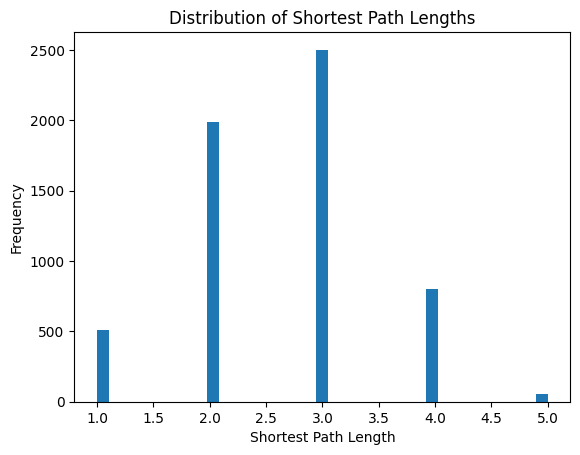

In [11]:
# This cell is used to output your data. Do not modify it.

# 2.1
G_lesmis = load_lesmis_data()

# 2.2
print("is this graph connected?", lesmis_connected(G_lesmis))

# 2.3
print("What is the average shortest path length?", average_shortest_path(G_lesmis))
print("What is the maximum shortest path length?", maximum_shortest_path(G_lesmis))

# 2.4
print("What 3 characters are most commonly mentioned characters?", popular_characters(G_lesmis))

# plots
plot_shortest_paths(G_lesmis)

### Part 3 - Components of Drosophila Optic Medulla [20 points]

### 3.1

In [12]:
# write a function to load drosophila_medulla_data.graphml using built in NetworkX methods
def load_drosophila_medulla_data() -> nx.Graph:
    """
    Returns:
    G: NetworkX Graph object
    """
    
    # this is a placeholder, load the drosophila_medulla data into a graph, G
    G = nx.read_graphml("drosophila_medulla_data.graphml")
                           
    return G

### 3.2

In [13]:
# Write a function to find the weakly connected components of this network, and return how many there are and what percentage of the nodes are in the largest weakly connected component.
def weakly_connected(G) -> Tuple[int, float]:
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    wccs (int): number of weakly connected components in the graph
    wpct (float): percent of nodes in the graph that belong to the largest weakly connected component
    
    """
    wccs = nx.number_weakly_connected_components(G)
    lwcc = max(nx.weakly_connected_components(G),key=len)

    wpct = (len(lwcc)/G.number_of_nodes())*100
    
    return wccs, round(wpct,2)


### 3.3

In [14]:
# Write a function to find the strongly connected components of this network, and return how many there are and what percentage of the nodes are in the largest strongly connected component

def strongly_connected(G) -> Tuple[int, float]:
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    sccs (int): number of strongly connected components in the graph
    spct (float): percent of nodes in the graph that belong to the largest strongly connected component
    
    """
    
    #These lines are placeholders
    sccs = nx.number_strongly_connected_components(G)
    lsccs = max(nx.strongly_connected_components(G),key=len)
    spct = (len(lsccs)/G.number_of_nodes())*100
    
    return sccs, round(spct,2)
    

### 3.4

In [15]:
# Calculate the average shortest path length and maximum shortest path length of the largest strongly connected component

def scc_shortest_paths(G) -> List:
    """
    Inputs
    G: NetworkX graph object
    
    Returns:
    shortest_paths (list): list of shortest paths between each pair of nodes in the graph.

    NOTE: 
    You may use any structure you'd like to store the shortest paths. The list return above is merely a suggestion.
    It can be a list of path lengths, a dictionary with node pairs as keys and path lengths as values, etc.
    
    """
    
    # These lines are placeholders
    # You may use any structure you like to store shortest paths.
    shortest_paths = []
    lscc = max(nx.strongly_connected_components(G),key=len)
    lscc_graph=G.subgraph(lscc)
    spl=nx.all_pairs_shortest_path_length(lscc_graph)
    for _,lengths in spl:
        shortest_paths.extend(list(lengths.values()))
    return shortest_paths

# plot the distribution of shortest paths for the scc using a histogram or barplot.
def plot_scc_shortest_paths(shortest_paths) -> None:
    """
    Inputs
    shortest_paths (list): list of shortest paths between each pair of nodes in the graph.

    Returns:
    Nothing
    """
    # Create a plot of the distribution of shortest paths.
    # you may use the scc_shortest_paths fuction to help.
    plt.hist(shortest_paths,bins='auto',edgecolor='blue')
    plt.title("Distribution of Shortest Paths")
    plt.xlabel("Shortest Paths")
    plt.ylabel("Frequency")
    plt.show()

# find the average shortest path length of the scc.
def average_scc_shortest_path(shortest_paths) -> float:
    """
    Inputs
    shortest_paths (list): list of shortest paths between each pair of nodes in the graph.

    Returns:
    aspl (float): average shortest path length of the graph
    """
    # This line is a placeholder
    # You may use the calculate_shortest_paths fuction to help.

    aspl = sum(shortest_paths)/len(shortest_paths)
    
    return aspl

# find the maximum shortest path length of the scc.
def maximum_scc_shortest_path(shortest_paths) -> int:
    """
    Inputs
    shortest_paths (list): list of shortest paths between each pair of nodes in the graph.

    Returns:
    mspl (int): maximum shortest path length of the graph
    """
    # This line is a placeholder
    # You may use the calculate_shortest_paths fuction to help.
    mspl = max(shortest_paths)
    
    return mspl

How many weakly connected components are there? 6
What percent of nodes belong to the largest weakly connected component 99.38
How many strongly connected components are there? 996
What percent of nodes belong to the largest strongly connected component 44.08
What is the average shortest path length of the SCC 3.66493082883687
What is the maximum shortest path length of the SCC 10


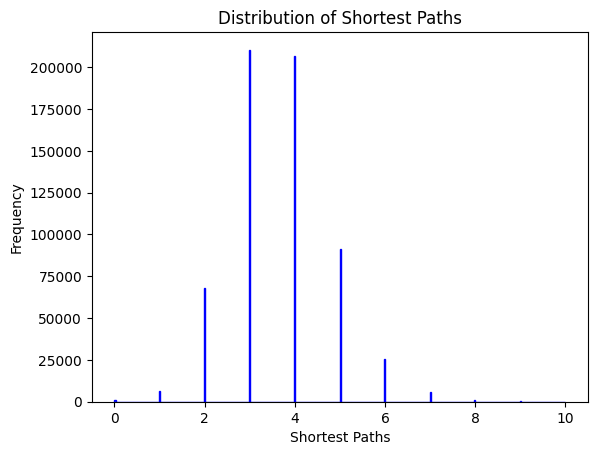

In [16]:
# This cell is used to output your data. Do not modify it.

# 3.1
G_dm = load_drosophila_medulla_data()

# 3.2
wccs, wpct = weakly_connected(G_dm)
print("How many weakly connected components are there?", wccs)
print("What percent of nodes belong to the largest weakly connected component", wpct)

# 3.3
sccs, spct = strongly_connected(G_dm)
print("How many strongly connected components are there?", sccs)
print("What percent of nodes belong to the largest strongly connected component", spct)

# 3.4
shortest_paths = scc_shortest_paths(G_dm)
print("What is the average shortest path length of the SCC", average_scc_shortest_path(shortest_paths))
print("What is the maximum shortest path length of the SCC", maximum_scc_shortest_path(shortest_paths))

# plots
plot_scc_shortest_paths(shortest_paths)

Comparing with the distribution of shortest paths, the average shortest path length in part 3 is slightly higher, and
the frequency is much higher.Therefore,while the network appears highly connected and robust when considering WCCs, it becomes significantly more fragmented when directionality is taken into account, as seen in the number of SCCs and the proportion of nodes in the largest SCC. This indicates the importance of directionality in the network's structure and functionality.


### Part 4 - Topologically Ordered Languages [20 points]
### 4.1

In [17]:
# write a function to load language_data.txt using built in NetworkX methods
from networkx.algorithms import bipartite
def load_language_data() -> nx.Graph:
    """
    Returns:
    G: NetworkX Graph object
    """
    
    # this is a placeholder, load the language data into a graph, G
    
    #G = nx.read_edgelist("language_data.txt",create_using=nx.DiGraph(),nodetype= str,delimiter='/t')
    
    G = nx.DiGraph()
    with open("language_data.txt", "r") as file:
        for line in file:
            languages = line.strip().split()
            G.add_edge(languages[1], languages[0])
    
    return G

### 4.2

In [18]:
# Write a function that will determine if a graph is a DAG or not

def is_graph_dag(G) -> bool:
    """
    Input:
    G: NetworkX graph object
    
    Returns:
    is_dag (Boolean): is the graph directed or not
    """
    
    # This is a placeholder
    is_dag = nx.is_directed_acyclic_graph(G)

    
    return is_dag




### 4.3

In [19]:
# Implement a function that will remove the first edge of each cycle

def remove_cycles(G) -> nx.Graph:
    """
    Input:
    G: NetworkX graph object
    
    Returns:
    G2: NetworkX graph object with cycles removed 
    
    """
    #This is placeholder
    G2 = G.copy()
    cycles = list(nx.simple_cycles(G))
    for cycle in cycles:
        first_edge = (cycle[-1],cycle[0])
        G2.remove_edge(*first_edge)
    
    return G2


### 4.4

In [20]:
# Write a function that returns the number of sources and the highest influencing node

def get_sources(G) -> Tuple[int, str]:
    """
    Inputs:
    G: NetworkX graph object
    
    Returns:
    num_sources (int): number of source nodes
    top_source (str): the name of the node with the highest level of influence
    """
    
    influence = nx.degree_centrality(G)
    
    sources = [node for node in G.nodes() if G.in_degree(node)==0]
    #top_source = max(sources,key=sources.get)
    num_sources = len(sources)
    descendants_count={node:len(nx.descendants(G,node)) for node in sources}
    top_source = max(descendants_count,key=descendants_count.get)
    
    return num_sources, top_source

In [21]:
# This cell is used to output your data. Do not modify it.

# 4.1
G_lang = load_language_data()

# 4.2
print("Is this graph a DAG?", is_graph_dag(G_lang))

# 4.3
print("Is this graph a DAG after modification?", is_graph_dag(remove_cycles(G_lang)))

# 4.4
num_sources, top_source = get_sources(G_lang)
print("There are {} sources in the graph, and the source with the highest influence is {}.".format(num_sources, top_source))

Is this graph a DAG? False
Is this graph a DAG after modification? True
There are 48 sources in the graph, and the source with the highest influence is speedcoding.


### Part 5 - Bipartite Projects of Github
### 5.1

In [22]:
# Write a function that will read in the github text file and return it as a NetworkX graph

def load_github_data() -> Tuple[nx.Graph, List[str], List[str]]:
    """
    Returns:
    G: NetworkX graph object
    uid_list (list): list of users
    pid_list (list): list of projects
    
    """
    G = nx.Graph()
    uid_list=set()
    pid_list=set()
    with open('github_data.txt', 'r') as file:
        for line in file:
            user_id, project_id = line.split()
            user_id = int(user_id)
            project_id = int(project_id)

            G.add_node(user_id, bipartite=0)  
            G.add_node(project_id, bipartite=1)  
            G.add_edge(user_id, project_id)
            uid_list.add(user_id)
            pid_list.add(project_id)
    

    # NOTE: We are also returning a list of users and projects. This will be helpful
    # when getting the correct user and project indicies from the projections.
        uid_list =sorted(list(uid_list))
        pid_list= sorted(list(pid_list))
    
    return G, uid_list, pid_list
    
    
    

### 5.2

In [23]:
# Create a function to create the User-Project Matrix 

def calculate_projections(G, uid_list, pid_list) -> Tuple[sp.sparse.spmatrix, sp.sparse.spmatrix]:
    """
    Inputs:
    G: NetworkX graph object
    uid_list (list): list of users
    pid_list (list): list of projects
    
    Returns:
    user_matrix (sp.sparse.spmatrix): one mode projection for users
    project_matrix (sp.sparse.spmatrix): one mode projection for projects
    """
   
    """
    users_projection = np.array([0,0])
    projects_projection = np.array([0,0])
    """
    
    user_index = {user: i for i, user in enumerate(uid_list)}
    project_index = {project: i for i, project in enumerate(pid_list)}
    
    num_users = len(uid_list)
    num_projects = len(pid_list)
    adj_matrix = sp.sparse.lil_matrix((num_users, num_projects))
    
    for user_id, project_id in G.edges():
        user_idx = user_index[user_id]
        project_idx = project_index[project_id]
        adj_matrix[user_idx, project_idx] = 1
        
    user_user_matrix = adj_matrix @ adj_matrix.T
    user_user_matrix.setdiag(0)  

    project_project_matrix = adj_matrix.T @ adj_matrix
    project_project_matrix.setdiag(0)  

    return user_user_matrix, project_project_matrix
    
    
#     with open('github_data.txt', 'r') as file:    
#         for line in file:
#             user_id,project_id=map(int,line.strip().split())
            
#             uid_list.append(user_id)
#             pid_list.append(project_id)
#             #print(uid_list)
#             uid_list =sorted(list(uid_list))
#             pid_list= sorted(list(pid_list))
#             user_index = uid_list.index(user_id)
#             project_index = pid_list.index(project_id)
#             adjacency_matrix[user_index, project_index] = 1
    
#     # Check and remove to ensure there are no edges between nodes of the same type.
#     edges_to_remove = [(u, v) for u, v in adj_matrix.edges() if type(u) == type(v)]
#     adjacency_maxtrix.remove_edges_from(edges_to_remove)
            
#     users_projection = adjacency_matrix.dot(adjacency_matrix.T)
    
#     projects_projection = adjacency_matrix.T.dot(adjacency_matrix)
    
#     return users_projection, projects_projection

In [24]:
G_gh, uid_list, pid_list = load_github_data()

# 5.2
user_matrix, project_matrix = calculate_projections(G_gh, uid_list, pid_list)


/anaconda3/envs/py_3_12_ds/lib/python3.12/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


### 5.3

In [25]:
# Write a function that will return the pair of users that share the highest number of Github projects between them.

def get_user_pair(M, uid_list) -> Tuple[str, str]:
    """
    Inputs:
    M: projected matrix
    uid_list (list): list of users
    
    Returns:
    u1 (str) - first user
    u2 (str) - second user
    """
    """
    M = sp.sparse.csr_matrix(M) 
    max_value = -1
     
    n = len(uid_list)
    for i in range(n):
        for j in range(i + 1, n):  
            if M[i, j] > max_value:
                max_value = M[i, j]
                best_pair_u = uid_list[i], uid_list[j]
                u1,u2 = best_pair_u
    return u1, u2
    """
    #max_value = np.max(M)
    #user_matrix, project_matrix = calculate_projections(G_gh, uid_list, pid_list)
    
    user_max = np.unravel_index(M.argmax(), M.shape)
    
    user1 = uid_list[user_max[0]]
    user2 = uid_list[user_max[1]]
    
    return user1, user2
    #return users_matrix

### 5.4

In [26]:
# Write a function that will return the pair of projects that share the highest number of users between them.
def get_project_pair(M, pid_list) -> Tuple[str, str]:
    """
    Inputs:
    M: projected matrix
    pid_list (list): list of projects
    
    Returns:
    p1 (str) - first project
    p2 (str) - second project
    """
    
    #max_value = np.max(M)
    #indices = np.where(pid_list==max_value)
    
    #p1 = pid_list[indices[0]]
    #p2 = pid_list[indices[1]]
    """
    max_value = -1
    M = sp.sparse.csr_matrix(M) 
    n = len(pid_list)
    for i in range(n):
        for j in range(i + 1, n):   
            if M[i, j] > max_value:
                max_value = M[i, j]
                best_pair_p = (pid_list[i], pid_list[j]) 
                p1,p2 = best_pair_p
    
    return p1, p2
    """
    
    project_max = np.unravel_index(M.argmax(), M.shape)
    
    project1 = pid_list[project_max[0]]
    project2 = pid_list[project_max[1]]
    
    return project1, project2


In [27]:
# This cell is used to output your data. Do not modify it.

# 5.1
G_gh, uid_list, pid_list = load_github_data()

# 5.2
user_matrix, project_matrix = calculate_projections(G_gh, uid_list, pid_list)

# 5.3
print("Which users shared the most projects?", get_user_pair(user_matrix, uid_list))

# 5.4
print("Which pair of project share the most users?", get_project_pair(project_matrix, pid_list))

Which users shared the most projects? (17, 299)
Which pair of project share the most users? (607, 645)
